In [2]:
import numpy as np
np.ceil(90.3)

91.0

In [1]:
import pandas as pd

data = pd.read_csv('probit.csv') 

df = pd.DataFrame(data)

FileNotFoundError: [Errno 2] No such file or directory: 'probit.csv'

In [282]:
df

,Percentage,Value
0,0,0.00
1,1,2.67
2,2,2.95
3,3,3.12
4,4,3.25
...,...,...
96,96,6.75
97,97,6.88
98,98,7.05
99,99,7.33


In [283]:
df['Value'][100]

8.95

In [31]:
num = int(input("input percentage"))
probit = df['Value'][num]
print(probit)


5.5


In [256]:
mort = []
mort.append(['Control Group',8])
mort.append(['350',25])
mort.append(['400',5])

mort_df = pd.DataFrame(mort)
mort_df

,0,1
0,Control Group,8
1,350,25
2,400,5


In [257]:
mort_df.columns =['Treatment', 'Mortality']
mort_df

,Treatment,Mortality
0,Control Group,8
1,350,25
2,400,5


In [258]:
cg_mort = mort_df['Mortality'][0]
cg_mort

8

In [259]:
def normalize(cg_mort, ex_mort):
    normalized_data = ((ex_mort - cg_mort)/(100-cg_mort))*100
    return abs(np.ceil(normalized_data))

In [260]:
normalize(10,2)

8.0

In [261]:
if cg_mort >=10:
    mort_df['Normalization'] = normalize(cg_mort,mort_df['Mortality'])
    mort_df['Normalization'][0] = cg_mort
else:
    mort_df['Normalization'] = "Not Applicable"
mort_df

,Treatment,Mortality,Normalization
0,Control Group,8,Not Applicable
1,350,25,Not Applicable
2,400,5,Not Applicable


In [279]:
probit_df = pd.DataFrame(mort_df)
mort_df
probit_df

,Treatment,Mortality,Normalization
0,Control Group,8,Not Applicable
1,350,25,Not Applicable
2,400,5,Not Applicable


In [286]:
probit_df['Mortality']

0     8
1    25
2     5
Name: Mortality, dtype: int64

In [310]:
b=probit_df['Mortality'].values
b

array([ 8, 25,  5], dtype=int64)

In [305]:
b=probit_df['Mortality'].values
b
probit_val = []
for i in b:
    probit_val.append(df['Value'][i])

probit_val

[3.59, 4.33, 3.36]

In [307]:
df['Probits']= probit_val
probit_df

ValueError: Length of values (3) does not match length of index (101)

In [273]:

probit_df

,Dose (Gy),Mortality,Corrected % Mortality
0,Control Group,8,Not Applicable
1,350,25,Not Applicable
2,400,5,Not Applicable


In [278]:
probit_df.columns = ['Dose (Gy)', 'Mortality', 'Corrected % Mortality']
probit_df

ValueError: Length mismatch: Expected axis has 4 elements, new values have 3 elements

In [276]:
probit_df["Dose (Gy)"] = pd.to_numeric(probit_df["Dose (Gy)"].loc[1:], downcast="float")


In [277]:
probit_df['Log Dose']= np.log10(probit_df['Dose (Gy)'].loc[1:])
probit_df

,Dose (Gy),Mortality,Corrected % Mortality,Log Dose
0,NaN,8,Not Applicable,NaN
1,350.0,25,Not Applicable,2.544068
2,400.0,5,Not Applicable,2.602060


In [265]:
probit_df['Treatment'].iloc[-1]

'400'

In [266]:
hays = probit_df['Treatment'].loc[1:]
hays

1    350
2    400
Name: Treatment, dtype: object

In [267]:
probit_df['Log Dose']= probit_df['Treatment'].iloc[1:] +121
probit_df

TypeError: can only concatenate str (not "int") to str

In [ ]:
probit_df['Log Dose'] = np.log10(df['Mortali'])
probit_df

C:\Users\dai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


TypeError: loop of ufunc does not support argument 0 of type int which has no callable log10 method

In [ ]:
probit_df['Dose (Gy)'][0]

'Control Group'

In [315]:

p_val = [ 3.45, 4.33, 5.31, 6.08, 6.48]
l_val = [2.54,2.60,2.65,2.69,2.74]

data = {'Log Dose': l_val, 'Probits': p_val}
df = pd.DataFrame(data)
df

,Log Dose,Probits
0,2.54,3.45
1,2.60,4.33
2,2.65,5.31
3,2.69,6.08
4,2.74,6.48


In [318]:
x1 = df['Log Dose'][0]
x2 = df['Log Dose'].iloc[-1]

y1 = df['Probits'][0]
y2 = df['Probits'].iloc[-1]


x1,x2,y1,y2

(2.54, 2.74, 3.45, 6.48)

In [319]:
m  = (y1-y2)/(x1-x2)
b  = (x1*y2 - x2*y1)/(x1-x2)

m,b

(15.149999999999988, -35.03099999999998)

In [320]:
x= (50-b)/m
x

5.612607260726076

In [322]:
xe = 10**2.64
xe

436.5158322401661

In [329]:
df

,Log Dose,Probits
0,2.54,3.45
1,2.60,4.33
2,2.65,5.31
3,2.69,6.08
4,2.74,6.48


Mean Squared Error :  0.019362238805970707
R-Squared : 0.9844349988697622
Y-intercept : [-36.99641791]
Slope : [[15.93283582]]


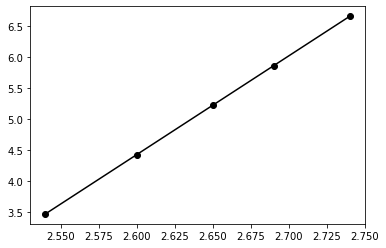

In [346]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
regressor = LinearRegression()
xx= df['Log Dose'].values.reshape(-1, 1)
yy = df['Probits'].values.reshape(-1, 1)
regressor.fit(xx, yy)

pred = regressor.predict(xx)

#model performance
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(yy, pred)
r2 = r2_score(yy, pred)#Best fit lineplt.scatter(x, y)
plt.plot(xx, pred, color = 'Black', marker = 'o')

#Results
print("Mean Squared Error : ", mse)
print("R-Squared :" , r2)
print("Y-intercept :"  , regressor.intercept_)
print("Slope :" , regressor.coef_)

In [333]:

from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Initialize Features
X = df.drop(['Log Dose'], axis = 1)
# Initialize Target
y = df['Probits']
# Create a model
lr = LinearRegression()
# Fit the model
lr.fit(X, y)
# make predictions
pred = lr.predict(X)

In [334]:
# Print intercept
print('Intercept:', lr.intercept_)

Intercept: 0.0


In [335]:
# Initialize Coefficient
coeff_df = pd.DataFrame(lr.coef_, X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Probits,1.0


In [336]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, pred)))
print('R2:', np.sqrt(metrics.r2_score(y, pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R2: 1.0


In [343]:
import statsmodels.api as sm

#adding a constant
X = sm.add_constant(x)

#performing the regression
result = sm.OLS(y, x).fit()

# Result of statsmodels 
print(result.summary())


In [349]:
pip install statsmodel.api

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement statsmodel.api (from versions: none)
ERROR: No matching distribution found for statsmodel.api
You should consider upgrading via the 'c:\Users\dai\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.
